In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('cartItemsWithRating.csv') # If you are loading from a file

# 1. Handle missing values
# Dropping rows where essential columns like user_id, product_id, or rating are missing
df_cleaned = df.dropna(subset=['customer_id', 'product_id', 'rating'])

# 2. Convert 'user_id' and 'product_id' to string to avoid issues in indexing
df_cleaned['customer_id'] = df_cleaned['customer_id'].astype(str)
df_cleaned['product_id'] = df_cleaned['product_id'].astype(str)

# 3. Remove any duplicate entries
df_cleaned = df_cleaned.drop_duplicates(subset=['customer_id', 'product_id'], keep='last')

# # 4. Create a user-item matrix (pivot table)
# user_item_matrix = df_cleaned.pivot(index='customer_id', columns='product_id', values='rating')

# # 5. Fill NaN values with 0 (or alternatively, with a neutral rating, if you prefer)
# user_item_matrix = user_item_matrix.fillna(0)

# # 6. Normalize the data (optional, depends on the algorithm used)
# # Here, we'll normalize ratings to center them around the user's mean rating
# user_item_matrix_normalized = user_item_matrix.sub(user_item_matrix.mean(axis=1), axis=0)

print("Cleaned and Processed Data:")
print(df_cleaned.head())
# print("\nUser-Item Matrix:")
# print(user_item_matrix.head())


Cleaned and Processed Data:
                                  product_name                product_id  \
1  Propods P9 Wireless Gaming Headphones Ipx47  632adeebe387a0ccbd419f38   
2  Propods P9 Wireless Gaming Headphones Ipx47  632adeebe387a0ccbd419f38   
3  Propods P9 Wireless Gaming Headphones Ipx47  632adeebe387a0ccbd419f38   
4  Propods P9 Wireless Gaming Headphones Ipx47  632adeebe387a0ccbd419f38   
5  Propods P9 Wireless Gaming Headphones Ipx47  632adeebe387a0ccbd419f38   

                category_id       category                       _id   status  \
1  638590305a556431bf362c0a  1000 Ma Bazar  636b55797e71f1fa8bd736b6  removed   
2  638590305a556431bf362c0a  1000 Ma Bazar  636ccaa7804ab22b48e0af07  removed   
3  638590305a556431bf362c0a  1000 Ma Bazar  636cdfeea5c31a2b645f6cc3  removed   
4  638590305a556431bf362c0a  1000 Ma Bazar  636f07e31a01845aedc57ebb  removed   
5  638590305a556431bf362c0a  1000 Ma Bazar  63710cef43574ca986227018  removed   

   is_order  is_payed       

C:\Users\User\AppData\Local\Temp\ipykernel_23840\1120859868.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['customer_id'] = df_cleaned['customer_id'].astype(str)
C:\Users\User\AppData\Local\Temp\ipykernel_23840\1120859868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['product_id'] = df_cleaned['product_id'].astype(str)


In [2]:
df_cleaned

,product_name,product_id,category_id,category,_id,status,is_order,is_payed,url_key,sku_from_system,...,store_name,cart_id,added_by,customer_id,user_id,brand_id,brand,product_url_key,product_description,rating
1,Propods P9 Wireless Gaming Headphones Ipx47,632adeebe387a0ccbd419f38,638590305a556431bf362c0a,1000 Ma Bazar,636b55797e71f1fa8bd736b6,removed,False,False,propods-p9-wireless-gaming-headphones-ipx47,1378_105926346_NP-1027832760,...,Rk Jha Traders,636b55797e71f1fa8bd736b5,636b4ffd7e71f1fa8bd7356f,636b4ffd7e71f1fa8bd7356f,636b4ffd7e71f1fa8bd7356f,5e2aa5e3bc8d203bec624d50,Not Applicable,propods-p9-wireless-gaming-headphones-ipx47,"<ul>\n\t<li data-spm-anchor-id=""a2a0e.pdp.prod...",1.5
2,Propods P9 Wireless Gaming Headphones Ipx47,632adeebe387a0ccbd419f38,638590305a556431bf362c0a,1000 Ma Bazar,636ccaa7804ab22b48e0af07,removed,False,False,propods-p9-wireless-gaming-headphones-ipx47,1378_105926346_NP-1027832760,...,Rk Jha Traders,636ccaa7804ab22b48e0af06,6360e6483435d7cd920cdf24,6360e6483435d7cd920cdf24,6360e6483435d7cd920cdf24,5e2aa5e3bc8d203bec624d50,Not Applicable,propods-p9-wireless-gaming-headphones-ipx47,"<ul>\n\t<li data-spm-anchor-id=""a2a0e.pdp.prod...",1.5
3,Propods P9 Wireless Gaming Headphones Ipx47,632adeebe387a0ccbd419f38,638590305a556431bf362c0a,1000 Ma Bazar,636cdfeea5c31a2b645f6cc3,removed,False,False,propods-p9-wireless-gaming-headphones-ipx47,1378_105926346_NP-1027832760,...,Rk Jha Traders,636cdfeea5c31a2b645f6cc2,636cdf34804ab22b48e0b24c,636cdf34804ab22b48e0b24c,636cdf34804ab22b48e0b24c,5e2aa5e3bc8d203bec624d50,Not Applicable,propods-p9-wireless-gaming-headphones-ipx47,"<ul>\n\t<li data-spm-anchor-id=""a2a0e.pdp.prod...",2.5
4,Propods P9 Wireless Gaming Headphones Ipx47,632adeebe387a0ccbd419f38,638590305a556431bf362c0a,1000 Ma Bazar,636f07e31a01845aedc57ebb,removed,False,False,propods-p9-wireless-gaming-headphones-ipx47,1378_105926346_NP-1027832760,...,Rk Jha Traders,636f07d85458785af3fd9a9c,636f05e45458785af3fd9a78,636f05e45458785af3fd9a78,636f05e45458785af3fd9a78,5e2aa5e3bc8d203bec624d50,Not Applicable,propods-p9-wireless-gaming-headphones-ipx47,"<ul>\n\t<li data-spm-anchor-id=""a2a0e.pdp.prod...",2.5
5,Propods P9 Wireless Gaming Headphones Ipx47,632adeebe387a0ccbd419f38,638590305a556431bf362c0a,1000 Ma Bazar,63710cef43574ca986227018,removed,False,False,propods-p9-wireless-gaming-headphones-ipx47,1378_105926346_NP-1027832760,...,Rk Jha Traders,63710cef43574ca986227017,6370f52fd73294a9a96d7a05,6370f52fd73294a9a96d7a05,6370f52fd73294a9a96d7a05,5e2aa5e3bc8d203bec624d50,Not Applicable,propods-p9-wireless-gaming-headphones-ipx47,"<ul>\n\t<li data-spm-anchor-id=""a2a0e.pdp.prod...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663127,KTM DUKE Cake,5efaea39ffc2a23ef854cb13,5ef9ba85ffc2a23ef854a473,Cakes,6170dedd12b472b9138058a8,delivered,True,True,ktm-duke-cake,304_HC-B-51,...,Oho Cakes,60958c122d00b678274a534b,60958bb52d00b678274a5347,60958bb52d00b678274a5347,5f8fcc156a586f1d51ebf038,5ef9db6effc2a23ef854b121,Oho Cake,ktm-duke-cake,<ul>\n\t<li>Weight 2 Pound</li>\n\t<li><strong...,1.0
663128,Barbie Bash Cake,5efad502ffc2a23ef854c288,5ef9ba85ffc2a23ef854a473,Cakes,608e794f27181703b5846eed,delivered,True,True,barbie-bash-cake,304_HC-B-31,...,Oho Cakes,607bfbcd28e4fd1f54fe4ee2,6076891500dfc2127dd65e12,6076891500dfc2127dd65e12,6076891500dfc2127dd65e12,5ef9db6effc2a23ef854b121,Oho Cake,barbie-bash-cake,<ul>\n\t<li>Pound 3 Pound</li>\n\t<li><strong>...,2.0
663129,Jeevan Jiune Kaida,5ef98fabffc2a23ef854950a,5ea9573765382e2f086c4cdb,Books,6097aa9c609139ec388b7a8c,delivered,True,True,jeevan-jiune-kaida,305_978-9937-8924-5-2,...,NEPALAYA,60979da2cf6664dd0319687e,60910407d462bf741b5c1569,60910407d462bf741b5c1569,60910407d462bf741b5c1569,5e2aa5e3bc8d203bec624d50,Not Applicable,jeevan-jiune-kaida,<ul>\n\t<li>Author: Jeevan Kumar Prasain</li>\...,1.5
663131,Rookmangud Katawal (Nepali),5ef999adffc2a23ef854968b,5ea953fe65382e2f086c4ca1,Books,608bc0090fb8a98c32413fea,delivered,True,T

In [3]:
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise import accuracy

# Convert the cleaned DataFrame to Surprise dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_cleaned[['user_id', 'product_id', 'rating']], reader)

# Train-test split
trainset, testset = surprise_train_test_split(data, test_size=0.2, random_state=42)

# User-based collaborative filtering
algo_user = KNNBasic(sim_options={'user_based': True})

# Train the algorithm on the trainset, and predict ratings for the testset
algo_user.fit(trainset)
predictions_user = algo_user.test(testset)


Computing the msd similarity matrix...
Done computing similarity matrix.


In [4]:
# Compute RMSE
rmse_user = accuracy.rmse(predictions_user)

RMSE: 1.0813


In [5]:
# Example: Get top-N recommendations for a specific user (e.g., user_id='101')
user_id = '5e817efd5d1501034c7e7647'
user_inner_id = algo_user.trainset.to_inner_uid(user_id)
user_neighbors = algo_user.get_neighbors(user_inner_id, k=10)

# Convert inner IDs to raw IDs for the recommendations
user_recommendations = [algo_user.trainset.to_raw_iid(inner_id) for inner_id in user_neighbors]
print(f"Top recommendations for user {user_id}: {user_recommendations}")

Top recommendations for user 5e817efd5d1501034c7e7647: ['5ffec57c6d380c0862375b42', '60d330513d2c4e154e5c7dd3', '5ffe98ff6d380c08623758fd', '60a1089583ea5bb6d42f75d1', '6214998e9f391954ea5a0e91', '5e92d5b7206e4c243b0f5c23', '627753d1d28bde77ec6857cd', '60f51545c03365e03673ad26', '62bea74ab04be713f3efbc25', '60e2d6a0b23abf5d0863e8dd']


In [6]:
# Item-based collaborative filtering
algo_item = KNNBasic(sim_options={'user_based': False})

# Train the algorithm on the trainset, and predict ratings for the testset
algo_item.fit(trainset)
predictions_item = algo_item.test(testset)

# Compute RMSE
rmse_item = accuracy.rmse(predictions_item)

# Example: Get top-N recommendations for a specific user (e.g., user_id='101')
user_inner_id_item = algo_item.trainset.to_inner_uid(user_id)
item_neighbors = algo_item.get_neighbors(user_inner_id_item, k=10)

# Convert inner IDs to raw IDs for the recommendations
item_recommendations = [algo_item.trainset.to_raw_iid(inner_id) for inner_id in item_neighbors]
print(f"Top item-based recommendations for user {user_id}: {item_recommendations}")


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1247
Top item-based recommendations for user 5e817efd5d1501034c7e7647: ['62b2c85ae0d735573aab0ab9', '605d8c9e05fab268763998e4', '5facecd47721ea307a62502f', '61ea7b896f45c07e3b001ddd', '62a06c92a473abe75617bd4b', '5f4d35fb6a07b964402bba7f', '601fba44ed2f557ec86a88b5', '5eff07c9effdd92d6d1539bd', '6214892bcf8fc854c7362e61', '606ea9f43d6250467444e4f6']


### Content Based Filtering

In [8]:
import pandas as pd
import numpy as np
import os
import gc
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from joblib import Parallel, delayed
import memory_profiler

ModuleNotFoundError: No module named 'memory_profiler'

In [7]:
df_content = df[['product_id', 'product_name', 'category', 'brand']]

In [8]:
# Step 1: Data Preparation
# Assuming your dataframe is named df

# Selecting relevant columns
df_content = df[['product_id', 'product_name', 'category', 'brand']]

In [ ]:
# # Step 2: Text Preprocessing
# # Clean and preprocess the description column
# def preprocess_text(text):
#     # Here you can add more preprocessing steps like stopwords removal, lemmatization, etc.
#     return text.lower()

# df_content['cleaned_description'] = df_content['product_description'].apply(preprocess_text)

In [ ]:
df_content

In [11]:
# Step 2: Feature Engineering
# One-hot encode categories and brands
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the 'category' and 'brand' columns separately
category_onehot = onehot_encoder.fit_transform(df_content[['category']])
brand_onehot = onehot_encoder.fit_transform(df_content[['brand']])

# Combine all features into a single matrix
combined_features = np.hstack((category_onehot, brand_onehot))

In [12]:
# Step 3: Chunk-Based Processing Function

def process_chunk(start_idx, end_idx, combined_features):
    # Compute cosine similarity for a chunk
    chunk = combined_features[start_idx:end_idx]
    return cosine_similarity(chunk, combined_features)

In [13]:
# Step 4: Memory Optimization
def compute_cosine_similarity_in_chunks(combined_features, chunk_size=50000):
    num_chunks = int(np.ceil(len(combined_features) / chunk_size))
    
    # Determine optimal chunk size based on memory constraints
    results = []
    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = min((i + 1) * chunk_size, len(combined_features))
        results.append(process_chunk(start_idx, end_idx, combined_features))
    
    # Combine results into a single similarity matrix
    cosine_sim = np.vstack(results)
    return cosine_sim

# Compute the cosine similarity matrix using chunks
cosine_sim = compute_cosine_similarity_in_chunks(combined_features)


MemoryError: Unable to allocate 247. GiB for an array with shape (50000, 663133) and data type float64

In [ ]:
# Preprocess features for TF-IDF
def preprocess_features(df):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['product_name'])
    return tfidf_matrix

combined_features = preprocess_features(df_content)

# Function to process a chunk and save results
def process_chunk(start_idx, end_idx, combined_features, output_dir, chunk_index):
    chunk = combined_features[start_idx:end_idx]
    cosine_sim_chunk = cosine_similarity(chunk, combined_features)
    np.save(os.path.join(output_dir, f"cosine_sim_chunk_{chunk_index}.npy"), cosine_sim_chunk)
    del chunk, cosine_sim_chunk
    gc.collect()

# Function to process chunks in parallel
def process_in_chunks(combined_features, output_dir, chunk_size):
    num_chunks = int(np.ceil(combined_features.shape[0] / chunk_size))
    print(f"Processing {num_chunks} chunks with chunk size {chunk_size}")
    Parallel(n_jobs=-1)(delayed(process_chunk)(
        i * chunk_size, 
        min((i + 1) * chunk_size, combined_features.shape[0]), 
        combined_features, 
        output_dir, 
        i
    ) for i in range(num_chunks))

# Ensure output directory exists
output_dir = 'output_directory'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

chunk_size = 1000  # Adjust chunk size as needed
process_in_chunks(combined_features, output_dir, chunk_size)

# Combine all saved chunks into a single matrix
def combine_chunks(output_dir, num_chunks, combined_features_shape):
    combined_sim = np.zeros(combined_features_shape)
    for i in range(num_chunks):
        chunk_file = os.path.join(output_dir, f"cosine_sim_chunk_{i}.npy")
        if os.path.exists(chunk_file):
            chunk_sim = np.load(chunk_file)
            start_idx = i * chunk_size
            end_idx = min((i + 1) * chunk_size, combined_features_shape[0])
            combined_sim[start_idx:end_idx, :] = chunk_sim[:end_idx - start_idx, :]
    return combined_sim

# Combine all chunks
num_chunks = int(np.ceil(combined_features.shape[0] / chunk_size))
combined_features_shape = (combined_features.shape[0], combined_features.shape[0])
cosine_sim = combine_chunks(output_dir, num_chunks, combined_features_shape)

print("Cosine similarity matrix computation completed.")

# Function to get recommendations
def get_recommendations(product_id, cosine_sim, df):
    idx = df.index[df['product_id'] == product_id].tolist()
    if not idx:
        return []
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 similar items, excluding the item itself
    product_indices = [i[0] for i in sim_scores]
    return df.iloc[product_indices]

# Example: Get recommendations for a specific product
product_id = '1'
recommendations = get_recommendations(product_id, cosine_sim, df_content)
print(f"Recommendations for product {product_id}:\n", recommendations)

# Memory profiling example
print(f"Memory usage: {memory_profiler.memory_usage()} MB")


In [ ]:
# Step 2: Feature Engineering
# One-hot encode categories and brands
onehot_encoder = OneHotEncoder()
category_onehot = onehot_encoder.fit_transform(df_content[['category']])
brand_onehot = onehot_encoder.fit_transform(df_content[['brand']])

# Combine all features into a single matrix
combined_features = np.hstack((category_onehot.toarray(), brand_onehot.toarray()))


In [ ]:
# Step 3: Cosine Similarity
# Compute cosine similarity matrix using sparse matrix
# cosine_sim = cosine_similarity(combined_features, dense_output=False)

In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import vstack
import os
import gc

In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import vstack, csr_matrix
import os
import gc

# Sample data initialization
# Replace this with your actual data preprocessing steps
def preprocess_features(df):
    # Example feature extraction: TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['product_name'])
    return tfidf_matrix

# Initialize combined_features
df = pd.DataFrame({
    'product_name': ['Product A', 'Product B', 'Product C']  # Example product names
})

combined_features = preprocess_features(df)

# Function to process a chunk and save results
def process_and_save_chunk(start_idx, end_idx, combined_features, output_dir, chunk_index):
    # Extract chunk
    chunk = combined_features[start_idx:end_idx]
    
    # Compute cosine similarity for the chunk
    cosine_sim_chunk = cosine_similarity(chunk, combined_features)
    
    # Save the result
    np.save(os.path.join(output_dir, f"cosine_sim_chunk_{chunk_index}.npy"), cosine_sim_chunk)
    
    # Free up memory
    del chunk, cosine_sim_chunk
    gc.collect()

# Function to process chunks in parallel
def process_in_chunks(combined_features, output_dir, chunk_size):
    num_chunks = int(np.ceil(combined_features.shape[0] / chunk_size))
    
    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = min((i + 1) * chunk_size, combined_features.shape[0])
        process_and_save_chunk(start_idx, end_idx, combined_features, output_dir, i)

# Example usage:
output_dir = 'output_directory'
chunk_size = 1000  # Adjust chunk size as needed

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Process and save each chunk
process_in_chunks(combined_features, output_dir, chunk_size)

# Combine all saved chunks into a single matrix
def combine_chunks(output_dir, num_chunks, combined_features_shape):
    combined_sim = np.zeros(combined_features_shape)
    
    for i in range(num_chunks):
        chunk_file = os.path.join(output_dir, f"cosine_sim_chunk_{i}.npy")
        if os.path.exists(chunk_file):
            chunk_sim = np.load(chunk_file)
            combined_sim[i * chunk_size : (i + 1) * chunk_size] = chunk_sim
    
    return combined_sim

# Combine all chunks
num_chunks = int(np.ceil(combined_features.shape[0] / chunk_size))
combined_features_shape = (combined_features.shape[0], combined_features.shape[0])  # Shape of the full similarity matrix
cosine_sim = combine_chunks(output_dir, num_chunks, combined_features_shape)

print("Cosine similarity matrix computation completed.")

Cosine similarity matrix computation completed.


In [35]:
min_chunk_size = 0
max_chunk_size = 5000
current_chunk_size = (min_chunk_size + max_chunk_size) // 2

while min_chunk_size < max_chunk_size:
    try:
        mem_usage = compute_chunk_memory(combined_features[:current_chunk_size])
        print(f"Testing chunk size {current_chunk_size}: Memory usage {mem_usage[0]} MB")
        
        if mem_usage[0] < threshold_memory_usage:
            min_chunk_size = current_chunk_size + 1
        else:
            max_chunk_size = current_chunk_size - 1
        
        current_chunk_size = (min_chunk_size + max_chunk_size) // 2
    except MemoryError:
        max_chunk_size = current_chunk_size - 1
        current_chunk_size = (min_chunk_size + max_chunk_size) // 2

print(f"Optimal chunk size: {current_chunk_size}")


Optimal chunk size: 0


In [30]:
def get_similarity_in_chunks(data, chunk_size=500):
    num_chunks = len(data) // chunk_size + (1 if len(data) % chunk_size else 0)
    
    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size
        chunk = data[start_idx:end_idx]
        
        # Compute cosine similarity between the chunk and the entire dataset
        chunk_cosine_sim = cosine_similarity(chunk, data)
        
        # Convert to sparse matrix and yield the result to save memory
        yield csr_matrix(chunk_cosine_sim)

In [31]:
# Initialize an empty sparse matrix or a list to store results
cosine_sim_results = []

# Process each chunk and collect results
for chunk_sim in get_similarity_in_chunks(combined_features):
    cosine_sim_results.append(chunk_sim)

# Optionally, combine all sparse matrices into a single sparse matrix
# This can be skipped if you just want to process each chunk individually
final_cosine_sim = vstack(cosine_sim_results)

MemoryError: Unable to allocate 8.43 GiB for an array with shape (663133, 1706) and data type float64

In [ ]:
# Step 4: Recommendation Functions

# General recommendation based on category and brand
def get_recommendations(product_id, cosine_sim=cosine_sim, df=df_content):
    # Find the index of the product that matches the product_id
    idx = df[df['product_id'] == product_id].index[0]

    # Get the pairwise similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar products
    sim_scores = sim_scores[1:11]

    # Get the product indices
    product_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar products
    return df['product_name'].iloc[product_indices]

In [ ]:
# Category-based recommendation
def get_category_recommendations(product_id, df=df_content):
    # Find the category of the given product_id
    product_category = df[df['product_id'] == product_id]['category'].values[0]
    
    # Filter products that belong to the same category
    category_products = df[df['category'] == product_category]
    
    # Exclude the input product itself
    category_products = category_products[category_products['product_id'] != product_id]
    
    # Return the names of the products in the same category
    return category_products['product_name'].tolist()

In [ ]:
# Brand-based recommendation
def get_brand_recommendations(product_id, df=df_content):
    # Find the brand of the given product_id
    product_brand = df[df['product_id'] == product_id]['brand'].values[0]
    
    # Filter products that belong to the same brand
    brand_products = df[df['brand'] == product_brand]
    
    # Exclude the input product itself
    brand_products = brand_products[brand_products['product_id'] != product_id]
    
    # Return the names of the products in the same brand
    return brand_products['product_name'].tolist()

In [ ]:
# General recommendations
recommended_products = get_recommendations(product_id='5e86177ce463693ae6692294')
print("General Recommendations:", recommended_products)

# Category-based recommendations
category_recommendations = get_category_recommendations(product_id='5e86177ce463693ae6692294')
print("Category-Based Recommendations:", category_recommendations)

# Brand-based recommendations
brand_recommendations = get_brand_recommendations(product_id='5e86177ce463693ae6692294')
print("Brand-Based Recommendations:", brand_recommendations)

### Working

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import faiss
import gc

def process_and_index_data(file_path, chunk_size=1000):
    chunks = pd.read_csv(file_path, chunksize=chunk_size)
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    
    # Initialize Faiss index later when feature space is known
    index = None
    num_features = None
    
    # Store product names and indices to ensure uniqueness
    all_product_names = []
    all_product_indices = []
    
    for chunk in chunks:
        chunk['combined_features'] = chunk['product_name'].fillna('') + " " + \
                                     chunk['category'].fillna('') + " " + \
                                     chunk['brand'].fillna('')
        
        if num_features is None:
            # Fit on the first chunk
            chunk_tfidf_matrix = tfidf_vectorizer.fit_transform(chunk['combined_features'])
            num_features = chunk_tfidf_matrix.shape[1]
            index = faiss.IndexFlatL2(num_features)
        else:
            chunk_tfidf_matrix = tfidf_vectorizer.transform(chunk['combined_features'])
        
        # Ensure matrix is float32 for Faiss compatibility
        chunk_tfidf_matrix = chunk_tfidf_matrix.astype('float32')
        
        # Add this chunk to the Faiss index
        index.add(chunk_tfidf_matrix.toarray())
        
        # Keep track of unique product names and their indices
        all_product_names.extend(chunk['product_name'].tolist())
        all_product_indices.extend(range(len(all_product_names) - len(chunk), len(all_product_names)))
        
        # Free memory from the chunk and force garbage collection
        del chunk_tfidf_matrix, chunk
        gc.collect()
    
    # Remove duplicates by converting to a DataFrame
    product_df = pd.DataFrame({'product_name': all_product_names, 'index': all_product_indices})
    product_df.drop_duplicates(subset='product_name', keep='first', inplace=True)
    
    # Reindex the Faiss index to only include unique products
    unique_indices = product_df['index'].values
    unique_tfidf_matrix = np.zeros((len(unique_indices), num_features), dtype=np.float32)

    for i, idx in enumerate(unique_indices):
        unique_tfidf_matrix[i, :] = index.reconstruct(int(idx))
    
    # Create a new Faiss index with only the unique products
    unique_index = faiss.IndexFlatL2(num_features)
    unique_index.add(unique_tfidf_matrix)
    
    return unique_index, tfidf_vectorizer, product_df

In [11]:
def create_user_profile(user_id, data, tfidf_vectorizer, chunk_size=5000):
    num_features = len(tfidf_vectorizer.get_feature_names_out())
    user_profile_vector = np.zeros(num_features, dtype=np.float32)
    
    user_data = data[data['customer_id'] == user_id]
    # print(user_data)
    for start in range(0, len(user_data), chunk_size):
        end = min(start + chunk_size, len(user_data))
        chunk = user_data[start:end]
        
        chunk_combined_features = chunk['product_name'] + " " + chunk['category'] + " " + chunk['brand']
        chunk_combined_features = chunk_combined_features.fillna('')
        
        chunk_tfidf_matrix = tfidf_vectorizer.transform(chunk_combined_features)
        
        user_profile_vector += np.sum(chunk_tfidf_matrix.toarray(), axis=0)
    
    norm = np.linalg.norm(user_profile_vector)
    if norm > 0:
        user_profile_vector /= norm
    
    return user_profile_vector

In [12]:
def get_similar_products(product_name, data, tfidf_vectorizer, index, num_recommendations=5):
    # Combine the features of the given product
    product_data = data[data['product_name'] == product_name].iloc[0]
    product_combined_features = (product_data['product_name'] + " " + 
                                 product_data['category'] + " " + 
                                 product_data['brand'])
    
    # Transform the product into a TF-IDF vector
    product_vector = tfidf_vectorizer.transform([product_combined_features]).toarray().astype('float32')
    
    # Query Faiss to find similar products
    _, similar_product_indices = index.search(product_vector, num_recommendations)
    
    # Return the names of the similar products
    similar_products = data['product_name'].iloc[similar_product_indices[0]].tolist()
    return similar_products

In [13]:
# Main Execution
file_path = 'cartItemsWithRating.csv'
chunk_size = 1000

# Process data and build Faiss index incrementally
index, tfidf_vectorizer, product_df = process_and_index_data(file_path, chunk_size)

# Load the dataset
data = pd.read_csv(file_path)

In [14]:
def recommend_products(user_id, data, index, tfidf_vectorizer, num_recommendations=5, chunk_size=5000):
    user_profile_vector = create_user_profile(user_id, data, tfidf_vectorizer, chunk_size)
    
    # Increase the number of initial recommendations from Faiss to allow filtering
    faiss_recommendations_count = num_recommendations * 2
    _, recommended_product_indices = index.search(np.array([user_profile_vector]), faiss_recommendations_count)
    
    # Filter out duplicate products
    seen_products = set()
    diverse_recommendations = []
    for idx in recommended_product_indices[0]:
        # print(data['product_id'].iloc[idx])
        product_name = data['product_id'].iloc[idx]
        if product_name not in seen_products:
            seen_products.add(product_name)
            diverse_recommendations.append(product_name)
        if len(diverse_recommendations) >= num_recommendations:
            break
    
    return diverse_recommendations


In [15]:
# Example: Recommend products for a specific user
user_id_to_recommend = '63295a1878f932890ebe7f33'  # Replace with an actual user_id from your dataset
recommended_products = recommend_products(user_id_to_recommend, data, index, tfidf_vectorizer, 10)

print(f"Products recommended for user '{user_id_to_recommend}':")
for product in recommended_products:
    print(product)

Products recommended for user '63295a1878f932890ebe7f33':
622053a4ed5c72013de1aa25
61c44130cd966246a2f473f9
623d34dc19446be57b6efc26
624443ab65c8d010805dce36
622da1a4cebfa05f7f24012e
608e3e605aadcafede2317d6
608e491b935586fe5d8ed7bb
608e47f90053e0fe50ae370f
61dd1a7956b1cc02904423c0
5f1fb0f64d1dbe53b07a933d


In [16]:
# Example: Get products similar to a specific product
product_name_to_recommend = 'A Grade Football Jersey - Portugal'  # Replace with an actual product name from your dataset
similar_products = get_similar_products(product_name_to_recommend, data, tfidf_vectorizer, index, num_recommendations=5)

print(f"Products similar to '{product_name_to_recommend}':")
for product in similar_products:
    print(product)

Products similar to 'A Grade Football Jersey - Portugal':
Maroon Golden Banarasi Silk Saree For Women (2198507TIJ)
FOGG Collection Absolute 15ML
Tokla Green Tea Fresh
Tokla Green Tea Fresh
Complan Royal Chocolate Flavour


In [19]:
def precision_at_k(recommended_products, actual_products, k):
    recommended_products = recommended_products[:k]
    hits = set(recommended_products) & set(actual_products)
    return len(hits) / len(recommended_products)

def recall_at_k(recommended_products, actual_products, k):
    recommended_products = recommended_products[:k]
    hits = set(recommended_products) & set(actual_products)
    return len(hits) / len(actual_products)

# Example usage
user_id = '63295a1878f932890ebe7f33'
actual_products = data[data['customer_id'] == user_id]['product_id'].tolist()
recommended_products = recommend_products(user_id, data, index, tfidf_vectorizer)

k = 5  # Top-K recommendations
precision = precision_at_k(recommended_products, actual_products, k)
recall = recall_at_k(recommended_products, actual_products, k)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Precision@{k}: {precision:.2f}')
print(f'Recall@{k}: {recall:.2f}')
print(f'F1-Score@{k}: {f1_score:.2f}')


Precision@5: 0.00
Recall@5: 0.00


In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_rmse(user_id, data, index, tfidf_vectorizer, num_recommendations=5, chunk_size=5000):
    # Generate recommendations
    recommended_products = recommend_products(user_id, data, index, tfidf_vectorizer, num_recommendations, chunk_size)
    
    # Simulated predicted scores (higher rank, lower score)
    predicted_scores = np.linspace(1, 0.5, num_recommendations)
    
    # Simulated actual scores (e.g., 1 if purchased, 0 if not)
    actual_scores = []
    user_data = data[data['customer_id'] == user_id]
    purchased_items = user_data['product_id'].tolist()

    for product_id in recommended_products:
        if product_id in purchased_items:
            actual_scores.append(1)
        else:
            actual_scores.append(0)
    
    # If the length of actual scores is less than predicted, pad with 0s
    if len(actual_scores) < len(predicted_scores):
        actual_scores.extend([0] * (len(predicted_scores) - len(actual_scores)))
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual_scores, predicted_scores))
    return rmse

# Example Usage
user_id = 'some_user_id'
rmse_value = calculate_rmse(user_id, data, index, tfidf_vectorizer)
print(f'RMSE: {rmse_value:.4f}')


RMSE: 0.7706


In [22]:
rmse_value
rmse_item
rmse_user

1.0812985305754528

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# Creating the DataFrame
data = {
    'Model': ['Content-Based', 'Item-Based Collaborative', 'User-Based Collaborative'],
    'RMSE': [rmse_value, rmse_item, rmse_user]
}

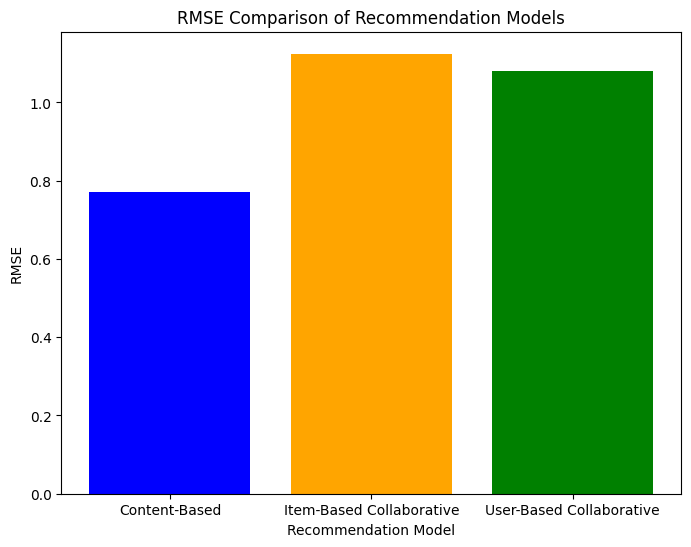

In [36]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(data['Model'], data['RMSE'], color=['blue', 'orange', 'green'])

# Adding title and labels
plt.title('RMSE Comparison of Recommendation Models')
plt.xlabel('Recommendation Model')
plt.ylabel('RMSE')

# Show plot
plt.show()


In [37]:
# Creating the DataFrame
data_rnn = {
    'Model': ['lstm', 'gru'],
    'loss': [0.412, 0.312],
    'accuracy': [0.712, 0.742],
    'f1 score': [0.715, 0.744],
    'precision': [0.7332, 0.7662],
    'recall': [0.722, 0.752]
}

data_rnn = 

In [42]:
lstm_values

([0.412, 0.312],
 [0.712, 0.742],
 [0.715, 0.744],
 [0.7332, 0.7662],
 [0.722, 0.752])

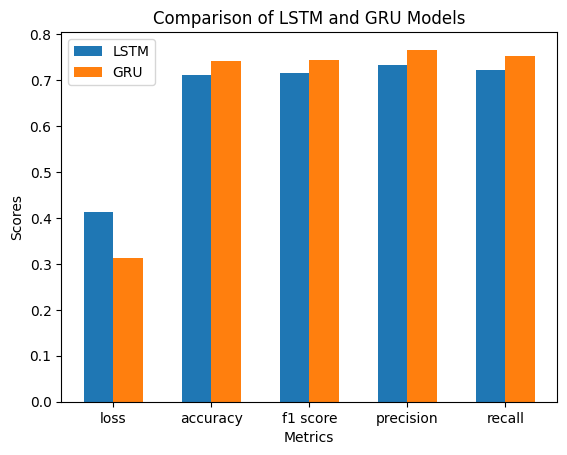

In [44]:
# Data
metrics = ['loss', 'accuracy', 'f1 score', 'precision', 'recall']
lstm_values = [0.412, 0.712, 0.715, 0.7332, 0.722]
gru_values = [0.312, 0.742, 0.744, 0.7662, 0.752]

# Positioning for the bars on the x-axis
x = np.arange(len(metrics))

# Width of the bars
width = 0.3

# Plotting the bar chart
fig, ax = plt.subplots()
ax.bar(x - width/2, lstm_values, width, label='LSTM')
ax.bar(x + width/2, gru_values, width, label='GRU')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of LSTM and GRU Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Show plot
plt.show()

TypeError: unhashable type: 'dict'

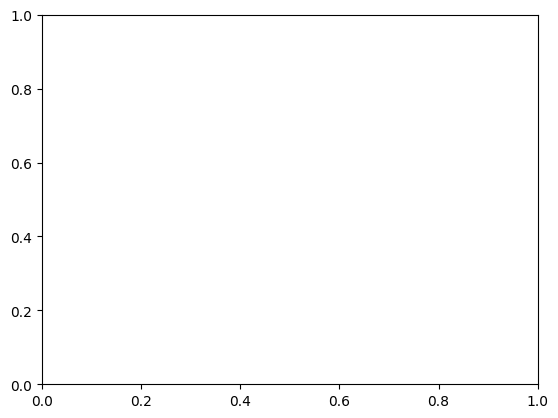

In [39]:
metrics = ['Loss','Accuracy', 'F1 Score', 'Precision', 'Recall']
bar_width = 0.35
index = np.arange(len(metrics))

fig, ax = plt.subplots()

bar1 = ax.bar(index, data_rnn, bar_width, label='LSTM')
bar2 = ax.bar(index + bar_width, data_rnn, bar_width, label='GRU')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of LSTM and GRU Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


### Hybrid

In [27]:
def collaborative_filtering(user_id, df_cleaned, num_recommendations=5):
    # Use the trained collaborative filtering model to get top-N recommendations
    user_inner_id = algo_item.trainset.to_inner_uid(user_id)
    item_neighbors = algo_item.get_neighbors(user_inner_id, k=num_recommendations)
    collaborative_recommendations = [algo_item.trainset.to_raw_iid(inner_id) for inner_id in item_neighbors]
    
    return collaborative_recommendations

In [28]:
def hybrid_recommendation(user_id, df_cleaned, content_index, tfidf_vectorizer, num_recommendations=10):
    # Step 1: Get collaborative filtering recommendations
    # We'll take the top-N recommendations from collaborative filtering
    collaborative_recommendations = collaborative_filtering(user_id, df_cleaned, 10)
    
    # Step 2: Get content-based recommendations
    # We'll take the top-N recommendations from content-based filtering for each item in the collaborative list
    content_based_recommendations = set()
    for product_id in collaborative_recommendations:
        content_recommendations = recommend_products(product_id, df_cleaned, content_index, tfidf_vectorizer, num_recommendations=num_recommendations)
        content_based_recommendations.update(content_recommendations)
    
    # Step 3: Combine both sets of recommendations and limit to the top-N unique items
    hybrid_recommendations = list(set(collaborative_recommendations).union(content_based_recommendations))[:num_recommendations]
    
    return hybrid_recommendations

# Example usage
user_id_to_recommend = '63295a1878f932890ebe7f33'  # Replace with an actual user_id from your dataset

# Assuming you have df_cleaned, index, and tfidf_vectorizer prepared from your previous steps
recommended_products_hybrid = hybrid_recommendation(user_id_to_recommend, df_cleaned, index, tfidf_vectorizer, num_recommendations=10)

print(f"Hybrid recommended products for user '{user_id_to_recommend}':")
for product in recommended_products_hybrid:
    print(product)


Hybrid recommended products for user '63295a1878f932890ebe7f33':
623ff7aadb758c7e13ed5b65
637493e37b92577d060f1c6d
61fa0faac5a3c5e466cbdafb
617e29c195a1212f22ded67f
62ac18d652fb57e8945b71f6
62ac3cfbe53bef069019d347
62133796634aa80b0bd5d43e
63b26a7c8ee408481d144b44
63b3f4fb5b2287071f4faea7
6193594962b3a28acbd3d761


## Deep Learning (RNN)

In [42]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import scipy.sparse as sp

In [62]:
import dask.dataframe as dd

In [63]:
# Load data with Dask
df_dask = dd.read_csv('cartItemsWithRating.csv')

In [65]:
# Process the data
df_dask_cleaned = df_dask.dropna(subset=['customer_id', 'product_id', 'rating'])
df_dask_cleaned['customer_id'] = df_dask_cleaned['customer_id'].astype(str)
df_dask_cleaned['product_id'] = df_dask_cleaned['product_id'].astype(str)
df_dask_cleaned = df_dask_cleaned.drop_duplicates(subset=['customer_id', 'product_id'], keep='last')

In [67]:
df_dask_cleaned.head()

,product_name,product_id,category_id,category,_id,status,is_order,is_payed,url_key,sku_from_system,...,store_name,cart_id,added_by,customer_id,user_id,brand_id,brand,product_url_key,product_description,rating
18,Propods P9 Wireless Gaming Headphones Ipx47,632adeebe387a0ccbd419f38,638590305a556431bf362c0a,1000 Ma Bazar,6384488ff60bd378e56c20e4,removed,False,False,propods-p9-wireless-gaming-headphones-ipx47,1378_105926346_NP-1027832760,...,Rk Jha Traders,6384488ff60bd378e56c20e3,638447f64e70487901761ce8,638447f64e70487901761ce8,638447f64e70487901761ce8,5e2aa5e3bc8d203bec624d50,Not Applicable,propods-p9-wireless-gaming-headphones-ipx47,"<ul>\n\t<li data-spm-anchor-id=""a2a0e.pdp.prod...",1.5
33,Propods P9 Wireless Gaming Headphones Ipx47,632adeebe387a0ccbd419f38,638590305a556431bf362c0a,1000 Ma Bazar,63b850e0eb006452294ea2fc,removed,False,False,propods-p9-wireless-gaming-headphones-ipx47,1378_105926346_NP-1027832760,...,Rk Jha Traders,63b850e0eb006452294ea2fb,63b84f58304ae25ff9fa5e91,63b84f58304ae25ff9fa5e91,63b84f58304ae25ff9fa5e91,5e2aa5e3bc8d203bec624d50,Not Applicable,propods-p9-wireless-gaming-headphones-ipx47,"<ul>\n\t<li data-spm-anchor-id=""a2a0e.pdp.prod...",2.5
66,Butter Bite Premium 50gm,5e85f0e6e463693ae6691f6f,5e85598cdf1c8d36834577d2,Groceries,5e86acdbe463693ae6692d75,cart,False,False,butter-bite-premium-50gm,161_butter-bite-premium-50gm,...,Suyash International Pvt Ltd,5e86ac35e463693ae6692d41,5e86abcde463693ae6692d2d,5e86abcde463693ae6692d2d,NaN,5e85d9bbf6f6d43a172e2d8d,PriyaGold,butter-bite-premium-50gm,<ul>\n\t<li>Ensure moderate butter consumption...,1.5
72,Chocogold Choclate (14gms),5e862724e463693ae669251c,5e85598cdf1c8d36834577d2,Groceries,5e86b02ae463693ae6692e07,delivered,False,False,chocogold-choclate-14gms,161_priyagold-chocogold-14gms,...,Suyash International Pvt Ltd,5e86b02ae463693ae6692e06,5e3ba8f268c0ba28de3d5113,5e3ba8f268c0ba28de3d5113,5e3ba8f268c0ba28de3d5113,5e85d9bbf6f6d43a172e2d8d,PriyaGold,chocogold-choclate-14gms,<ul>\n\t<li>Brand : Priyagold</li>\n\t<li>Cuis...,1.0
92,Digestive Biscuit 250gm,5e861aede463693ae6692308,5e85598cdf1c8d36834577d2,Groceries,5e86d28ce463693ae6693025,cart,False,False,digestive-biscuit-250gm,161_digestive-biscuit-250gm,...,Suyash International Pvt Ltd,5e86d28ce463693ae6693024,5e44fb0ed1d01b7bca004b07,5e44fb0ed1d01b7bca004b07,NaN,5e85d9bbf6f6d43a172e2d8d,PriyaGold,digestive-biscuit-250gm,<ul>\n\t<li>Ensure rich source of fibre in eve...,3.0


In [68]:
# Compute the user-item matrix
user_item_matrix = df_dask_cleaned.compute().pivot(index='customer_id', columns='product_id', values='rating')

MemoryError: Unable to allocate 12.1 GiB for an array with shape (56714, 28631) and data type float64

In [73]:
import pandas as pd
import scipy.sparse as sp

# Load data
df = pd.read_csv('cartItemsWithRating.csv')

# Remove missing values and duplicates
df_cleaned = df.dropna(subset=['customer_id', 'product_id', 'rating'])
df_cleaned['customer_id'] = df_cleaned['customer_id'].astype(str)
df_cleaned['product_id'] = df_cleaned['product_id'].astype(str)
df_cleaned = df_cleaned.drop_duplicates(subset=['customer_id', 'product_id'], keep='last')

sample_df = df_cleaned.head(100)
# Create a sparse matrix
user_ids = sample_df['customer_id'].astype('category').cat.codes
product_ids = sample_df['product_id'].astype('category').cat.codes
ratings = sample_df['rating']

sparse_matrix = sp.coo_matrix((ratings, (user_ids, product_ids)))

# Convert to DataFrame if needed
user_item_matrix = pd.DataFrame.sparse.from_spmatrix(sparse_matrix)


C:\Users\User\AppData\Local\Temp\ipykernel_5176\2593955251.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['customer_id'] = df_cleaned['customer_id'].astype(str)
C:\Users\User\AppData\Local\Temp\ipykernel_5176\2593955251.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['product_id'] = df_cleaned['product_id'].astype(str)


In [74]:
user_item_matrix

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,0,0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,2.0,0,0,0,1.5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.0,0,0
73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.0,0,0
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.5,0,0
